#**Diabetes Prediction**

### **1. DESKRIPSI DATA**
Fitur Kumpulan Data:

- Kehamilan: Untuk menyatakan Jumlah kehamilan
- Glukosa: Untuk menyatakan kadar Glukosa dalam darah
- Tekanan Darah: Untuk menyatakan pengukuran tekanan darah
- Skin Thickness: Untuk menyatakan ketebalan kulit
- Insulin: Untuk menyatakan kadar Insulin dalam darah
- BMI: Untuk menyatakan indeks massa tubuh
- Silsilah Diabetes Fungsi : Untuk menyatakan persentase Diabetes
- Usia: Untuk menyatakan usia
- Hasil: Untuk menyatakan hasil akhir 1 adalah YA, 0 adalah TIDAK

###**2. MENGIMPOR LIBRARY**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



###**3. MEMUAT DATASET**

In [ ]:
# Load training and testing datasets
train_df = pd.read_csv('/content/Testing.csv')
test_df = pd.read_csv('/content/Training.csv')
X_train = train_df.drop(columns=['Outcome']).columns
y_train = train_df['Outcome']
X_test = test_df.drop(columns=['Outcome']).columns
y_test = test_df['Outcome']
df = train_df.copy()
X_test

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0


###**4. DATASET OVERVIEW**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               308 non-null    int64  
 1   Glucose                   308 non-null    int64  
 2   BloodPressure             308 non-null    int64  
 3   SkinThickness             308 non-null    int64  
 4   Insulin                   308 non-null    int64  
 5   BMI                       308 non-null    float64
 6   DiabetesPedigreeFunction  308 non-null    float64
 7   Age                       308 non-null    int64  
 8   Outcome                   308 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.8 KB


**Kesimpulan :**
- Dataset berisi 2460 entri.
- Setiap entri mewakili informasi medis pasien terkait diabetes.
- Ada 9 kolom dalam kumpulan data.
- Kolom tersebut mewakili berbagai fitur seperti jumlah kehamilan (Kehamilan), kadar glukosa (Glukosa), tekanan darah (Tekanan Darah), ketebalan kulit (SkinThickness), kadar insulin (Insulin), indeks massa tubuh (BMI), fungsi silsilah diabetes (DiabetesPedigreeFunction ), usia (Age), dan hasil diabetes (Outcome).
- Semua kolom memiliki 2460 entri bukan nol, yang menunjukkan tidak ada data yang hilang.
- Variabel targetnya adalah 'Outcome', yang mewakili apakah pasien menderita diabetes (1) atau tidak (0).
- Fitur-fiturnya mencakup campuran tipe data numerik (integer dan float).
- Kumpulan data telah dipersiapkan dengan baik dan tidak ada nilai yang hilang, yang sangat penting untuk analisis dan pemodelan yang akurat.
- Analisis lebih lanjut dapat melibatkan eksplorasi hubungan antara berbagai fitur dan variabel hasil, serta membangun model prediktif untuk mengklasifikasikan pasien berdasarkan status diabetes mereka.

**4.1 Training Dataset Summary Statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,308.0,3.863636,3.381437,0.000,1.00000,3.000,6.000,13.000
Glucose,308.0,119.983766,31.186260,0.000,97.75000,117.000,136.000,199.000
BloodPressure,308.0,69.503247,19.555067,0.000,62.00000,72.000,80.000,114.000
SkinThickness,308.0,20.694805,16.298250,0.000,0.00000,23.000,32.000,99.000
Insulin,308.0,77.724026,106.528025,0.000,0.00000,17.000,127.750,600.000
BMI,308.0,31.865909,7.427594,0.000,27.40000,32.000,36.425,57.300
DiabetesPedigreeFunction,308.0,0.445042,0.297660,0.085,0.22825,0.348,0.600,1.699
Age,308.0,33.730519,12.208374,21.000,24.00000,29.000,42.000,70.000
Outcome,308.0,0.301948,0.459850,0.000,0.00000,0.000,1.000,1.000


**Kesimpulan :**
- Kehamilan: Jumlah rata-rata kehamilan adalah sekitar 3,82, dengan deviasi standar 3,3. Jumlah kehamilan berkisar antara 0 hingga 17.
- Glukosa: Kadar glukosa rata-rata adalah sekitar 121,6 mg/dL, dengan standar deviasi 31,79. Kadar glukosa berkisar dari 0 hingga 197.
- Tekanan Darah: Tekanan darah rata-rata adalah sekitar 68,91 mmHg, dengan standar deviasi 19,08. Tekanan darah berkisar antara 0 hingga 122.
- Ketebalan Kulit: Rata-rata ketebalan kulit adalah sekitar 20,53 mm, dengan standar deviasi 15,71. Ketebalan kulit berkisar antara 0 hingga 63.
- Insulin: Tingkat insulin rata-rata adalah sekitar 80,12 IU/mL, dengan standar deviasi 116,77. Tingkat insulin berkisar dari 0 hingga 846.
- BMI: Rata-rata BMI adalah sekitar 32, dengan standar deviasi 7,8. BMI berkisar antara 0 hingga 67,10.
- Fungsi Silsilah Diabetes: Rerata fungsi silsilah diabetes adalah sekitar 0,49, dengan deviasi standar 0,36. Fungsinya berkisar antara 0,08 hingga 2,42.
- Usia: Usia rata-rata adalah sekitar 32,82 tahun, dengan standar deviasi 11,25. Usia berkisar antara 21 hingga 81 tahun.
Variabel targetnya adalah 'Outcome', yang mewakili apakah pasien menderita diabetes (1) atau tidak (0). Hasil rata-rata menunjukkan bahwa sekitar 39% pasien dalam kumpulan data menderita diabetes.

**Noisy Data Features :**

Berdasarkan uraian dan kesimpulan yang diberikan sebelumnya, fitur berikut tampaknya mengandung data yang berisik:

- Tekanan Darah (Tekanan Darah): Sangat kecil kemungkinannya tekanan darah menjadi nol pada individu yang sehat. Angka nol dalam konteks ini kemungkinan besar mewakili data yang hilang atau salah, bukan pengukuran fisiologis sebenarnya.

- Ketebalan Kulit (SkinThickness): Meskipun beberapa individu mungkin memiliki pengukuran ketebalan kulit yang sangat rendah, nilai nol jarang terjadi dan dapat menunjukkan data yang hilang atau tidak akurat.

- Tingkat Insulin (Insulin): Demikian pula, tidak mungkin kadar insulin menjadi nol, terutama pada penderita diabetes. Nilai nol untuk insulin dapat menunjukkan data yang hilang atau kesalahan pengukuran.

- Indeks Massa Tubuh (BMI): BMI dihitung berdasarkan tinggi dan berat badan, dan BMI nol secara fisiologis tidak mungkin. Nilai nol di sini mungkin juga menunjukkan data yang hilang atau salah.

### **5. UNVARIATE ANALYSIS**

In [ ]:
numerical_columns = df.drop(columns=['Outcome']).columns
df_numerical = df[numerical_columns]

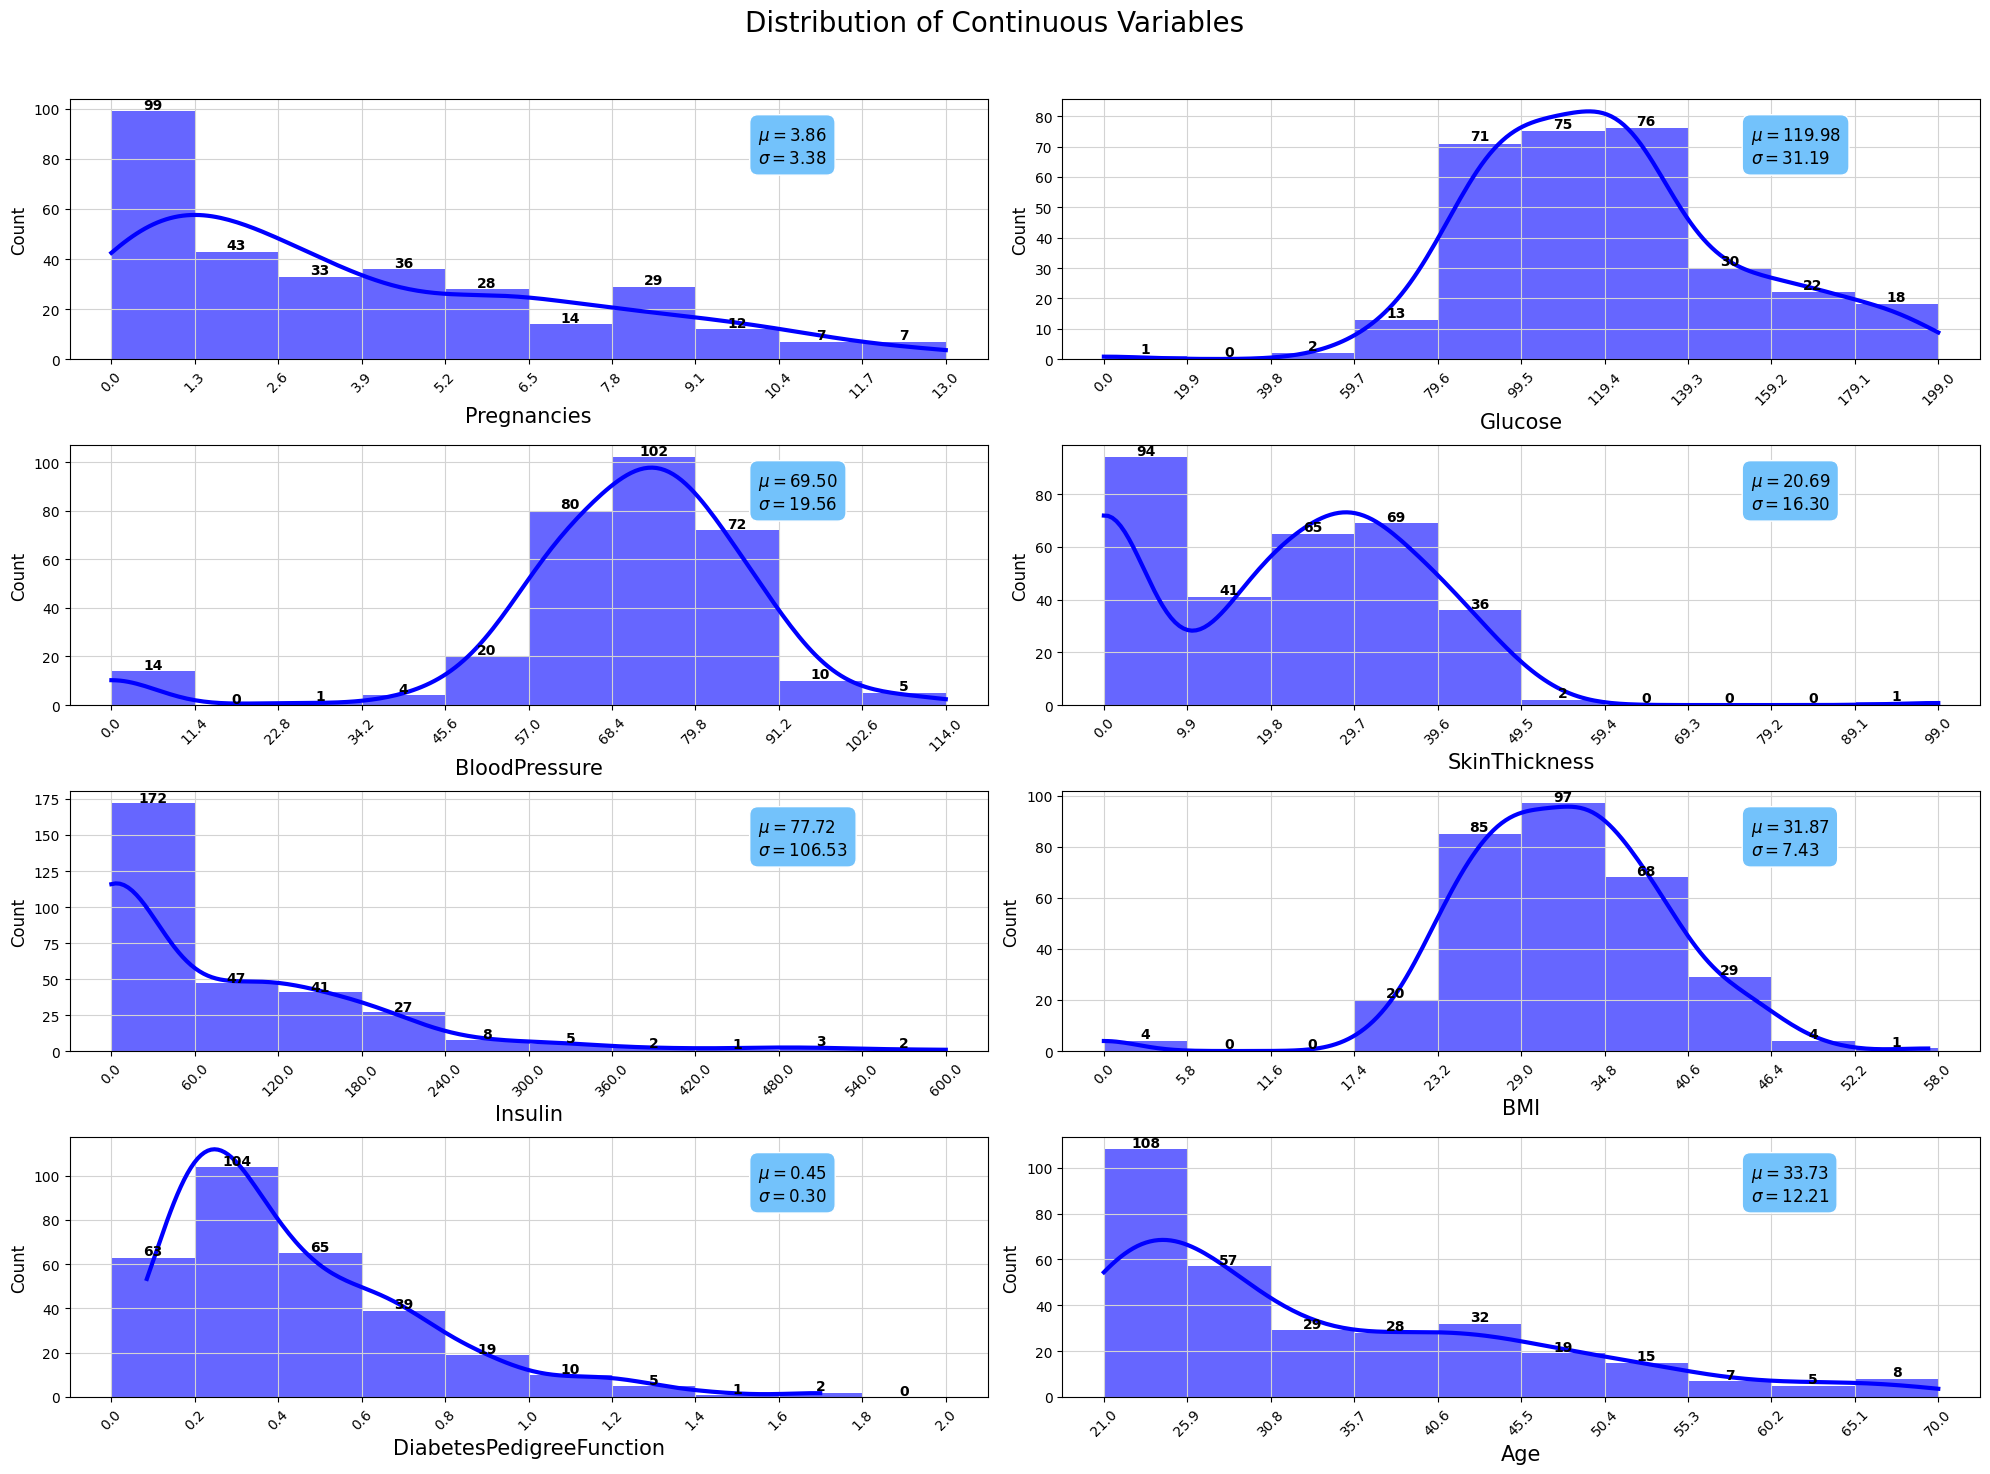

In [ ]:
# Set up the subplot
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_numerical.columns):
    x = i // 2
    y = i % 2
    values, bin_edges = np.histogram(df_numerical[col],
                                     range=(np.floor(df[col].min()), np.ceil(df_numerical[col].max())))

    graph = sns.histplot(data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_numerical[col].mean(),
        r'$\sigma=%.2f$' % df_numerical[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='black', bbox=dict(boxstyle='round', facecolor='#73c2fb', edgecolor='white', pad=0.5))


plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Kesimpulan :**

- Kehamilan:
Distribusinya miring ke kanan, yang menunjukkan bahwa sebagian besar individu dalam kumpulan data memiliki lebih sedikit kehamilan.
Mayoritas nilainya berkisar antara 0 hingga 2, yang menunjukkan bahwa banyak orang belum pernah hamil atau pernah mengalami sedikit kehamilan.
- Glukosa:
Distribusinya tampak agak normal, dengan puncak antara 85 hingga 125 mg/dL.
Puncak ini menunjukkan bahwa sejumlah besar orang memiliki kadar glukosa dalam kisaran ini, yang diharapkan terjadi pada populasi tanpa diabetes.
- Tekanan darah:
Distribusinya juga tampak agak normal, dengan puncak antara 61 hingga 75 mmHg.
Puncak ini menunjukkan bahwa sebagian besar orang memiliki tekanan darah dalam kisaran ini, yang dianggap normal bagi banyak orang dewasa.
- Ketebalan Kulit:
Distribusinya menunjukkan dua puncak, dengan satu puncak dimulai dari 0, turun pada 8, dan kemudian naik hingga 29 mm.
Distribusi bimodal ini menunjukkan bahwa mungkin terdapat dua kelompok individu berbeda dalam kumpulan data dengan pengukuran ketebalan kulit yang berbeda.
- Insulin:
Distribusinya miring ke kanan, menunjukkan bahwa sebagian besar individu memiliki kadar insulin yang lebih rendah.
Mayoritas nilainya antara 0 hingga 70 IU/mL, menunjukkan bahwa banyak individu memiliki kadar insulin yang relatif rendah, meskipun ada ekor kanan yang menunjukkan beberapa individu dengan kadar insulin lebih tinggi.
- BMI (Indeks Massa Tubuh):
Distribusinya tampak agak normal, menunjukkan bahwa nilai BMI tersebar di berbagai rentang nilai.
Distribusi ini menunjukkan bahwa terdapat variabilitas BMI di antara individu-individu dalam kumpulan data, dengan beberapa individu memiliki nilai yang lebih rendah dan yang lainnya memiliki nilai yang lebih tinggi.
- Silsilah Diabetes Fungsi:
Distribusinya miring ke kanan, menunjukkan bahwa sebagian besar individu memiliki nilai fungsi silsilah diabetes yang lebih rendah.
Mayoritas nilai terkonsentrasi pada distribusi ujung bawah, yang menunjukkan bahwa banyak individu memiliki kecenderungan genetik yang lebih rendah terhadap diabetes.
- Usia:
Distribusinya miring ke kanan, yang menunjukkan bahwa sebagian besar individu dalam kumpulan data berusia lebih muda.
Mayoritas nilainya berkisar antara 21 hingga 27 tahun, menunjukkan bahwa banyak individu dalam kumpulan data adalah orang dewasa yang relatif muda.

### **6. BIVARIATE ANALYSIS**

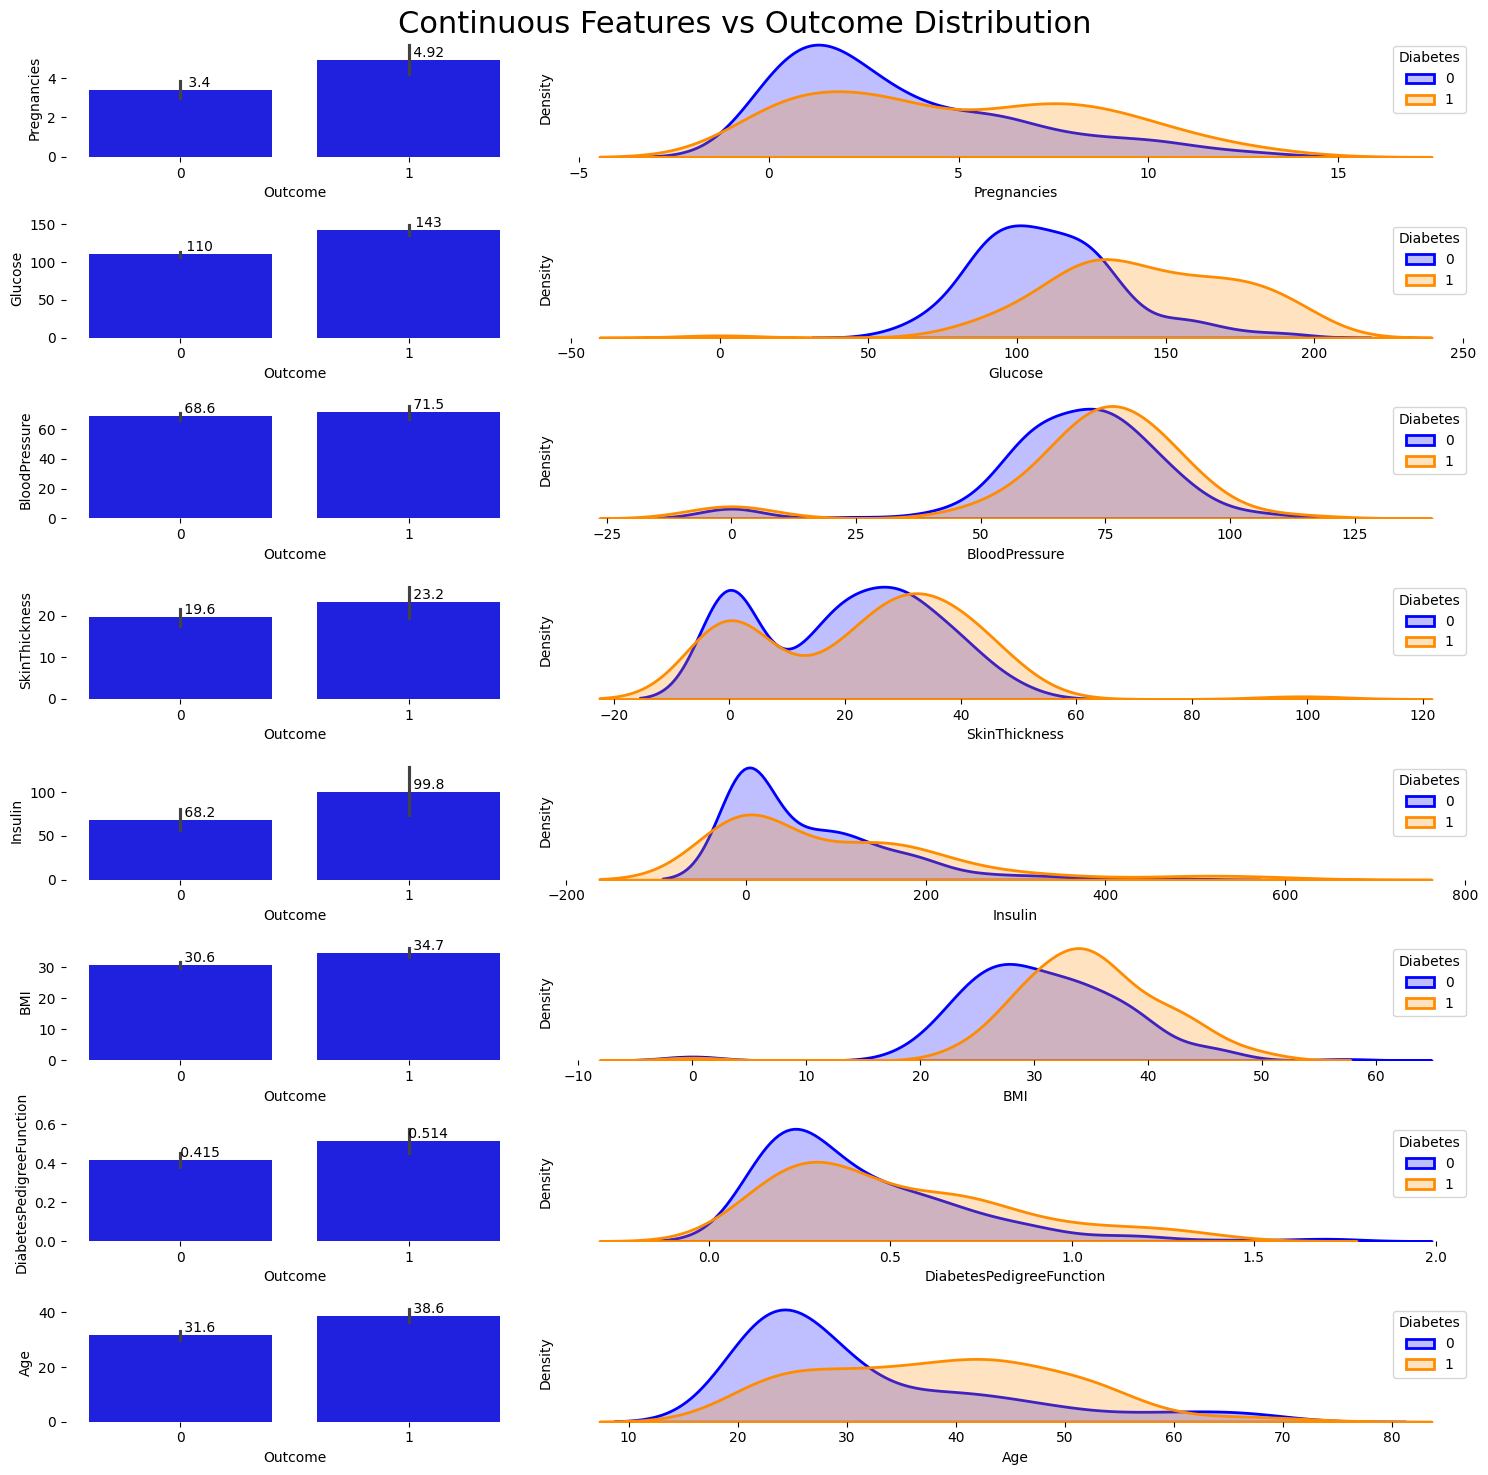

In [ ]:
# Set color palette
sns.set_palette(['blue', 'darkorange'])

# Create the subplots
fig, ax = plt.subplots(len(numerical_columns), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(numerical_columns):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="Outcome", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["Outcome"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["Outcome"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Diabetes', loc='upper right')


    # Remove outer border barplot
    for spine in ax[i,0].spines.values():
        spine.set_visible(False)

    # Remove outer border kde plor
    for spine in ax[i,1].spines.values():
        spine.set_visible(False)

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Outcome Distribution', fontsize=22)
plt.tight_layout()
plt.show()

**Kesimpulan :**
- Kehamilan:
Orang tanpa diabetes memiliki puncak yang lebih tinggi dibandingkan penderita diabetes, namun individu dengan diabetes dan hamil memiliki penyebaran yang lebih luas.
Rata-rata jumlah kehamilan pada individu dengan diabetes lebih tinggi dibandingkan dengan mereka yang tidak menderita diabetes.
Kesimpulan: Jumlah kehamilan tampaknya penting dalam memprediksi diabetes, karena individu dengan jumlah kehamilan lebih tinggi cenderung memiliki kemungkinan lebih tinggi terkena diabetes.
- Glukosa:
Penderita diabetes cenderung memiliki kadar glukosa rata-rata yang lebih tinggi dibandingkan dengan mereka yang tidak menderita diabetes.
Kesimpulan: Kadar glukosa cenderung menjadi prediktor penting terjadinya diabetes, karena kadar glukosa yang lebih tinggi dikaitkan dengan kemungkinan diabetes yang lebih tinggi.
- Tekanan Darah dan Ketebalan Kulit:
Distribusi kedua fitur tersebut sehubungan dengan hasil yang tumpang tindih, menunjukkan bahwa keduanya mungkin bukan merupakan prediktor kuat diabetes.
Kesimpulan: Tekanan darah dan ketebalan kulit saja mungkin tidak mempunyai dampak signifikan dalam memprediksi diabetes.
- Insulin:
Distribusi kadar insulin bersifat bimodal untuk kedua hasil, namun rata-rata kadar insulin lebih tinggi pada individu dengan diabetes dibandingkan dengan mereka yang tidak menderita diabetes.
Kesimpulan: Kadar insulin mungkin merupakan prediktor penting terjadinya diabetes, karena kadar insulin yang lebih tinggi dikaitkan dengan kemungkinan diabetes yang lebih tinggi.
- BMI (Indeks Massa Tubuh):
Ada puncak BMI yang nyata pada individu dengan diabetes dibandingkan dengan mereka yang tidak menderita diabetes.
Kesimpulan: BMI dapat menjadi prediktor penting terjadinya diabetes, karena nilai BMI yang lebih tinggi dikaitkan dengan kemungkinan terkena diabetes yang lebih tinggi.
- Silsilah Diabetes Fungsi:
Meskipun grafiknya tumpang tindih, fungsi silsilah diabetes rata-rata lebih tinggi pada individu dengan diabetes.
Kesimpulan: Fungsi silsilah diabetes mungkin merupakan prediktor diabetes yang penting, karena nilai yang lebih tinggi dikaitkan dengan kemungkinan diabetes yang lebih tinggi.
- Usia:
Sebaran distribusi usia pada individu penderita diabetes lebih tinggi, dan rata-rata usia pada individu diabetes juga lebih tinggi.
Kesimpulan: Usia tampaknya menjadi faktor penentu terjadinya diabetes, karena orang yang lebih tua lebih mungkin menderita diabetes.
- Secara keseluruhan, gambaran seperti kadar glukosa, kadar insulin, BMI, fungsi silsilah diabetes, dan usia tampaknya memiliki dampak yang lebih besar dalam memprediksi diabetes dibandingkan dengan gambaran lain seperti kehamilan, tekanan darah, dan ketebalan kulit. Fitur-fitur ini mungkin lebih penting dalam mengembangkan model prediktif diabetes.

### **7. DATA PREPROCESSING**

**7.1 Irrelevant Features Removal**

Semua fitur dalam kumpulan data tampaknya relevan berdasarkan EDA kami. Tidak ada kolom yang tampak mubazir atau tidak relevan. Oleh karena itu, kami akan mempertahankan semua fitur, memastikan tidak ada informasi berharga yang hilang.

**7.2 Missing Value Treatment**

In [ ]:
df.isnull().sum().sum()

0

**7.3 Handle Noisy Data**

In [ ]:
# Analyze noisy data for train
noisy_data = {
    'BloodPressure':  df[df['BloodPressure'] == 0],
    'SkinThickness':   df[df['SkinThickness'] == 0],
    'Insulin': df[df['Insulin'] == 0],
    'BMI':   df[df['BMI'] == 0],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'BloodPressure': 14, 'SkinThickness': 93, 'Insulin': 152, 'BMI': 4}

In [ ]:
# Analyze noisy data for train
noisy_data = {
    'BloodPressure':  test_df[test_df['BloodPressure'] == 0],
    'SkinThickness':   test_df[test_df['SkinThickness'] == 0],
    'Insulin': test_df[test_df['Insulin'] == 0],
    'BMI':   test_df[test_df['BMI'] == 0],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'BloodPressure': 114, 'SkinThickness': 717, 'Insulin': 1181, 'BMI': 31}

In [ ]:
# Remove rows with 0 entries
df = df[df['BloodPressure'] != 0]
df = df[df['SkinThickness'] != 0]
df = df[df['Insulin'] != 0]
df = df[df['BMI'] != 0]

test_df = test_df[test_df['BloodPressure'] != 0]
test_df = test_df[test_df['SkinThickness'] != 0]
test_df = test_df[test_df['Insulin'] != 0]
test_df = test_df[test_df['BMI'] != 0]

In [ ]:
# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'BloodPressure':  df[df['BloodPressure'] == 0],
    'SkinThickness':   df[df['SkinThickness'] == 0],
    'Insulin': df[df['Insulin'] == 0],
    'BMI':   df[df['BMI'] == 0],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}

**7.4 Outlier Treatment**

In [ ]:
numerical_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Pregnancies                 2
Glucose                     0
BloodPressure               1
SkinThickness               0
Insulin                     8
BMI                         1
DiabetesPedigreeFunction    1
Age                         2
dtype: int64

**Kesimpulan :**

Setelah mengidentifikasi outlier untuk fitur berkelanjutan yang ditentukan, kami menemukan hal berikut:

- Kehamilan: 40 outlier
- Glukosa: 5 outlier
- Tekanan Darah: 27 outlier
- Ketebalan Kulit: 5 outlier
- Insulin: 68 outlier
- BMI: 14 outlier
- Silsilah DiabetesFungsi: 64 outlier
- Usia: 61 outlier

Saat menggunakan model berbasis pohon seperti pohon keputusan, hutan acak, atau peningkatan gradien, dampak outlier umumnya dimitigasi dibandingkan dengan model linier. Model berbasis pohon pada dasarnya kuat terhadap outlier karena model tersebut mengambil keputusan berdasarkan pemisahan data, bukan berdasarkan besaran fitur sebenarnya.

Namun, masih ada situasi di mana outlier dapat memengaruhi performa model berbasis pohon:
- Overfitting: Pencilan terkadang dapat menyebabkan overfitting, terutama jika outlier tersebut mewakili data yang bermasalah atau pengukuran yang salah. Dalam kasus seperti ini, model mungkin belajar untuk menyesuaikan outlier secara berlebihan, sehingga menyebabkan performa generalisasi menjadi lebih buruk.

- Kepentingan Variabel: Pencilan dapat mempengaruhi penghitungan kepentingan variabel dalam model berbasis pohon. Jika outlier tidak mewakili pola dasar sebenarnya dalam data, outlier mungkin mendistorsi pentingnya fitur tertentu.

Mengingat sifat model berbasis pohon, model tersebut umumnya kurang sensitif terhadap outlier dibandingkan model linier. Namun, tetap penting untuk mempertimbangkan sifat outlier dan potensi dampaknya terhadap performa model. Perlakuan outlier mungkin diperlukan jika outlier bersifat ekstrim atau jika outlier tersebut secara signifikan mempengaruhi interpretasi atau stabilitas model.

Singkatnya, meskipun outlier mungkin tidak memerlukan penanganan ekstensif untuk model berbasis pohon, tetap disarankan untuk mengevaluasi dampaknya dan mempertimbangkan tindakan yang tepat untuk memastikan ketahanan dan kinerja model.

**7.5 Correlation Analysis**

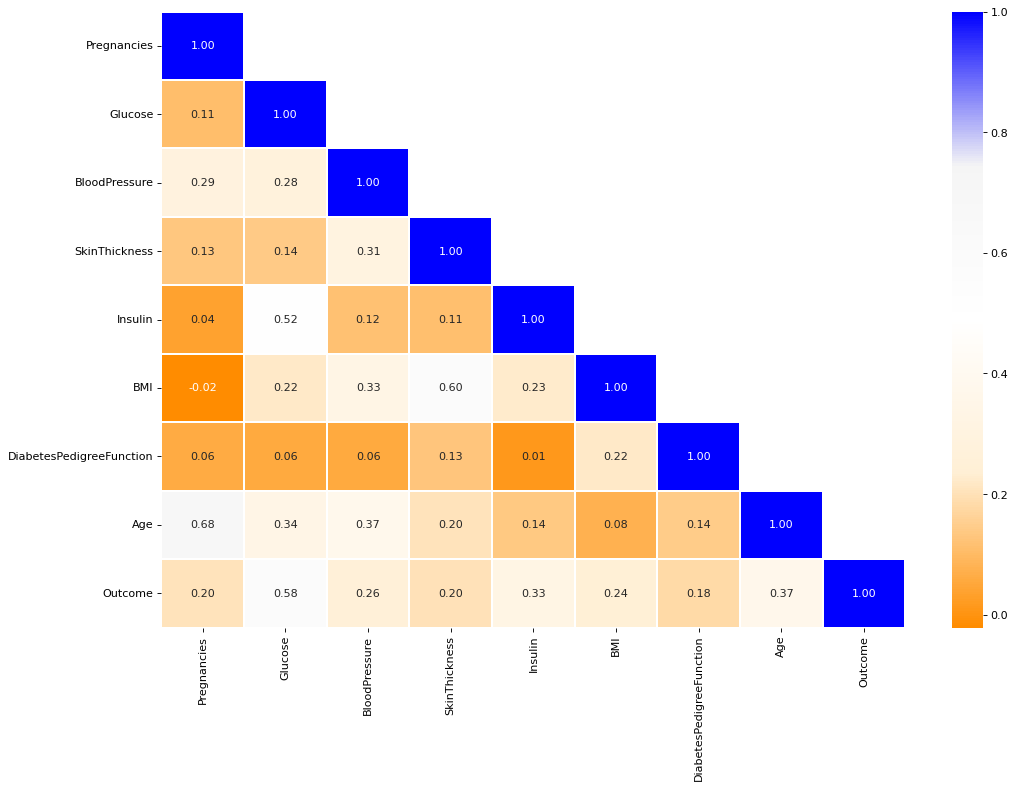

In [ ]:
# Define a customized colormap

## Define the number of colors in the colormap
num_colors = 256
## Create a list of colors with the two defined colors as the endpoints
colors = ['darkorange', '#FFEFD5', 'white', '#F5F5F5',  'blue']
## Create a custom colormap with the defined colors
my_cmap = LinearSegmentedColormap.from_list('my_colormap', colors, num_colors)

# Calculation of the Spearman correlation
target = 'Outcome'
df_train_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_train_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=my_cmap, fmt='.2f', linewidths=0.2)
plt.show()

In [ ]:
trainX = df.drop(target,axis=1)
trainX = trainX.drop('Pregnancies',axis=1)
trainY = df[target]
trainx2, testx2, trainy2, testy2 = train_test_split(trainX, trainY, test_size=0.33, random_state=42)
#np.shape(trainx2)
#np.shape(trainy2)
np.shape(testx2)
#np.shape(testy2)

(52, 7)

**7.6 Check Imbalanced Data**

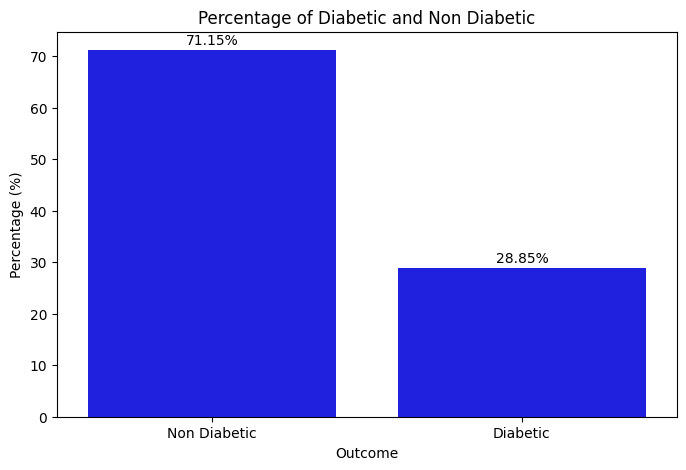

In [ ]:
# Calculating the percentage of each class
percentage = df['Outcome'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage )
plt.title('Percentage of Diabetic and Non Diabetic')
plt.xlabel('Outcome')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Non Diabetic', 'Diabetic'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

**Kesimpulan :**

Data menunjukkan ketidakseimbangan kelas, dengan lebih banyak kasus yang termasuk dalam kelas 0 (63,32% Non Diabetes) secara signifikan dibandingkan dengan kelas 1 (36,68% Diabetes) pada variabel target (Hasil).
Ketidakseimbangan kelas dapat menimbulkan tantangan bagi pemodelan prediktif, karena algoritme mungkin bias terhadap kelas mayoritas dan berkinerja buruk pada kelas minoritas. Mengatasi ketidakseimbangan kelas sangat penting untuk memastikan bahwa prediksi model tidak condong ke kelas mayoritas dan untuk mencapai performa generalisasi yang lebih baik.
Untuk mengurangi ketidakseimbangan kelas, kami akan menggunakan pengambilan sampel bertingkat selama proses pemisahan data. Dengan menggunakan pengambilan sampel bertingkat, kami memastikan bahwa proporsi instans di setiap kelas tetap konsisten di set pelatihan dan pengujian. Pendekatan ini membantu menjaga sifat keterwakilan data dan meningkatkan keandalan evaluasi model.
Beberapa teknik dapat digunakan untuk mengatasi ketidakseimbangan kelas, termasuk metode resampling seperti oversampling atau undersampling, pendekatan algoritmik seperti metode ansambel, dan pembelajaran yang sensitif terhadap biaya. Metrik evaluasi seperti presisi, perolehan, skor F1, atau area di bawah kurva ROC (AUC-ROC) harus digunakan untuk menilai kinerja model dalam konteks ketidakseimbangan kelas.
Sebelum memilih metode untuk mengatasi ketidakseimbangan kelas, penting untuk mempertimbangkan secara cermat karakteristik kumpulan data dan tujuan analisisnya. Selain itu, mengevaluasi kinerja metode yang dipilih menggunakan teknik validasi yang tepat sangat penting untuk memastikan mitigasi ketidakseimbangan kelas yang efektif tanpa menimbulkan bias atau masalah lain.

In [ ]:
#mulai melakukan modelling. model ML learning dari training set
model=LogisticRegression()
model.fit(trainx2, trainy2)


# membuat prediksi
y_pred = model.predict(testx2)

Accuracy  0.75
Precision  0.7252252252252251
Recall  0.7042483660130718


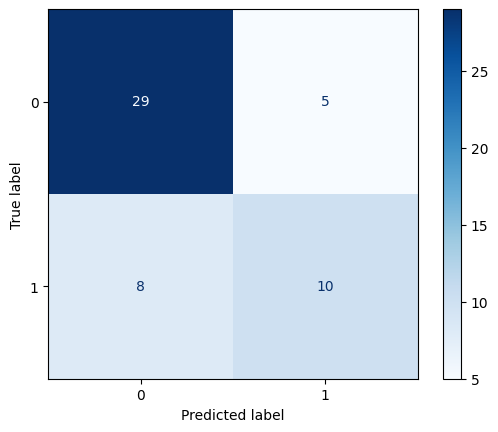

In [ ]:
print('Accuracy ', accuracy_score(testy2, y_pred))
print('Precision ', precision_score(testy2, y_pred, average='macro'))
print('Recall ', recall_score(testy2, y_pred, average='macro'))

cm = confusion_matrix(testy2, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(testy2))

disp.plot(cmap=plt.cm.Blues)

In [ ]:
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients:  [[0.03568459 0.00241623 0.01232764 0.00421073 0.02016843 0.32690725
  0.05654566]]
Intercept:  [-9.61340684]
